#### packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt
import forestplot as fp

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data

In [4]:
df = pd.read_csv('re_0826.csv', encoding='cp949')
df.isnull().sum()

pid              0
majorcat         0
province         0
area             0
sex              0
                ..
주당근로시간           0
주당근로시간_binary    0
직장에서의복리후생제공여부    0
보험가입여부           0
직장만족도            0
Length: 141, dtype: int64

In [5]:
df_copy = df.copy()

In [6]:
수도권 = df_copy[(df_copy['사업체지역']=='서울')|(df_copy['사업체지역']=='경기')].copy()

model_1 = sm.Logit.from_formula('''LongWork2 ~ C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    + C(보험가입여부,Treatment('가입하지않음'))''', 수도권).fit()
print('==================================Model Summary=========================================')
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.363320
         Iterations 6
==================================Model Summary=========================================


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2330
Method:                           MLE   Df Model:                            2
Date:                Fri, 01 Sep 2023   Pseudo R-squ.:                 0.02125
Time:                        09:04:53   Log-Likelihood:                -847.62
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                 1.019e-08
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -2.0843      0.099    -21.110      0.000      -2.278      -1.891
C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]     0.9265      0.147      6.291      0.000       0.638       1.215
C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]            -0.1744      0.133     -1.307      0.191      -0.436       0.087
==================================================================================================================
"""

In [7]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_1 = pd.DataFrame(
    {
        "OR": model_1.params,
        "Lower CI": model_1.conf_int()[0],
        "Upper CI": model_1.conf_int()[1],
    }
)
odds_ratios_1 = np.exp(odds_ratios_1)
odds_ratios_1

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.12439,0.10251,0.15095
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.52566,1.89243,3.37078
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",0.83995,0.64671,1.09094


In [18]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ + 나이 + C(성별,Treatment("여자")) + C(건강상태,Treatment("건강하지않다")) 
    + C(결혼상태, Treatment("미혼")) + C(전공일치,Treatment("맞지않다")) 
    + 학점 + C(재학중일자리경험,Treatment('없다'))''', 수도권).fit()
print('==================================Model Summary=========================================')
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.333136
         Iterations 7
==================================Model Summary=========================================


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2213
Model:                          Logit   Df Residuals:                     2203
Method:                           MLE   Df Model:                            9
Date:                Fri, 01 Sep 2023   Pseudo R-squ.:                 0.09748
Time:                        09:06:15   Log-Likelihood:                -737.23
converged:                       True   LL-Null:                       -816.85
Covariance Type:            nonrobust   LLR p-value:                 1.065e-29
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -8.8573      0.975     -9.088      0.000     -10.767      -6.947
C(성별, Treatment("여자"))[T.남자]            -0.1812      0.154     -1.174      0.240      -0.484       0.121
C(건강상태, Treatment("건강하지않다"))[T.건강하다]     0.3324      0.231      1.436      0.151      -0.121       0.786
C(건강상태, Treatment("건강하지않다"))[T.보통이다]     0.0755      0.252      0.299      0.765      -0.419       0.570
C(결혼상태, Treatment("미혼"))[T.기혼]           1.2504      0.306      4.090      0.000       0.651       1.850
C(전공일치, Treatment("맞지않다"))[T.보통이다]       0.1432      0.176      0.816      0.415      -0.201       0.487
C(전공일치, Treatment("맞지않다"))[T.잘맞다]        0.5182      0.160      3.245      0.001       0.205       0.831
C(재학중일자리경험, Treatment('없다'))[T.있다]      -0.5778      0.138     -4.178      0.000      -0.849      -0.307
나이                                       0.2760      0.033      8.337      0.000       0.211       0.341
학점                                      -0.1818      0.126     -1.446      0.148      -0.428       0.065
========================================================================================================
"""

In [19]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_2 = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios_2 = np.exp(odds_ratios_2)
odds_ratios_2

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.00014,0.00002,0.00096
"C(성별, Treatment(""여자""))[T.남자]",0.83423,0.61640,1.12904
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",1.39433,0.88584,2.19471
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",1.07840,0.65789,1.76770
"C(결혼상태, Treatment(""미혼""))[T.기혼]",3.49181,1.91783,6.35758
"C(전공일치, Treatment(""맞지않다""))[T.보통이다]",1.15393,0.81800,1.62781
"C(전공일치, Treatment(""맞지않다""))[T.잘맞다]",1.67900,1.22781,2.29599
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.56114,0.42792,0.73584
나이,1.31786,1.23506,1.40621
학점,0.83374,0.65158,1.06682


In [23]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    + 나이 + C(성별,Treatment('여자')) + C(건강상태,Treatment('건강하지않다')) 
    + C(전공일치,Treatment('맞지않다')) 
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다'))''', 수도권).fit()
print('==================================Model Summary=========================================')
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.325673
         Iterations 7
==================================Model Summary=========================================


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2213
Model:                          Logit   Df Residuals:                     2196
Method:                           MLE   Df Model:                           16
Date:                Fri, 01 Sep 2023   Pseudo R-squ.:                  0.1177
Time:                        09:07:29   Log-Likelihood:                -720.72
converged:                       True   LL-Null:                       -816.85
Covariance Type:            nonrobust   LLR p-value:                 2.869e-32
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -9.2277      0.983     -9.389      0.000     -11.154      -7.302
C(성별, Treatment('여자'))[T.남자]                 -0.2854      0.156     -1.833      0.067      -0.590       0.020
C(건강상태, Treatment('건강하지않다'))[T.건강하다]          0.2522      0.250      1.011      0.312      -0.237       0.741
C(건강상태, Treatment('건강하지않다'))[T.보통이다]          0.0940      0.262      0.360      0.719      -0.419       0.607
C(전공일치, Treatment('맞지않다'))[T.보통이다]            0.1022      0.178      0.575      0.565      -0.246       0.450
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.2897      0.165      1.751      0.080      -0.035       0.614
C(재학중일자리경험, Treatment('없다'))[T.있다]           -0.6067      0.140     -4.337      0.000      -0.881      -0.333
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]       -0.3597      0.287     -1.255      0.210      -0.922       0.202
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]      -0.3381      0.251     -1.349      0.177      -0.829       0.153
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]       -0.6536      0.373     -1.754      0.079      -1.384       0.077
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]      -0.3411      0.258     -1.320      0.187      -0.848       0.165
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]      0.8138      0.329      2.476      0.013       0.170       1.458
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]     0.4590      0.218      2.108      0.035       0.032       0.886
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]          -1.2963      0.234     -5.548      0.000      -1.754      -0.838
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]         -0.5057      0.155     -3.267      0.001      -0.809      -0.202
나이                                            0.3119      0.033      9.459      0.000       0.247       0.376
학점                                           -0.1495      0.127     -1.175      0.240      -0.399       0.100
=============================================================================================================
"""

In [24]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.00010,0.00001,0.00067
"C(성별, Treatment('여자'))[T.남자]",0.75175,0.55406,1.01997
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.28691,0.78901,2.09899
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.09861,0.65797,1.83435
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.10756,0.78199,1.56867
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.33600,0.96605,1.84764
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.54513,0.41441,0.71710
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.69787,0.39789,1.22400
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",0.71310,0.43637,1.16530
"C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]",0.52017,0.25060,1.07969


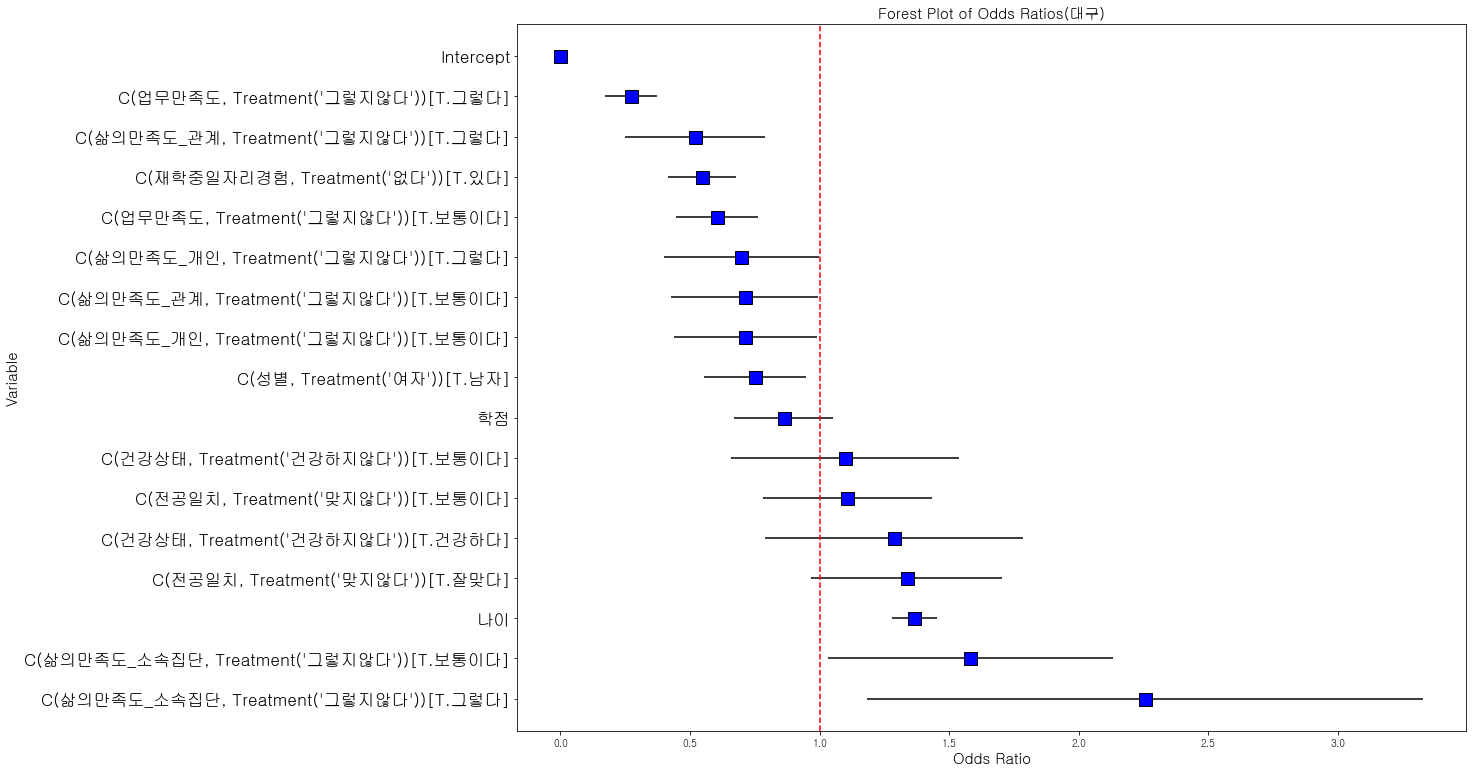

In [26]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios_3.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios(대구)', fontsize=15)

# Show the plot
plt.show()

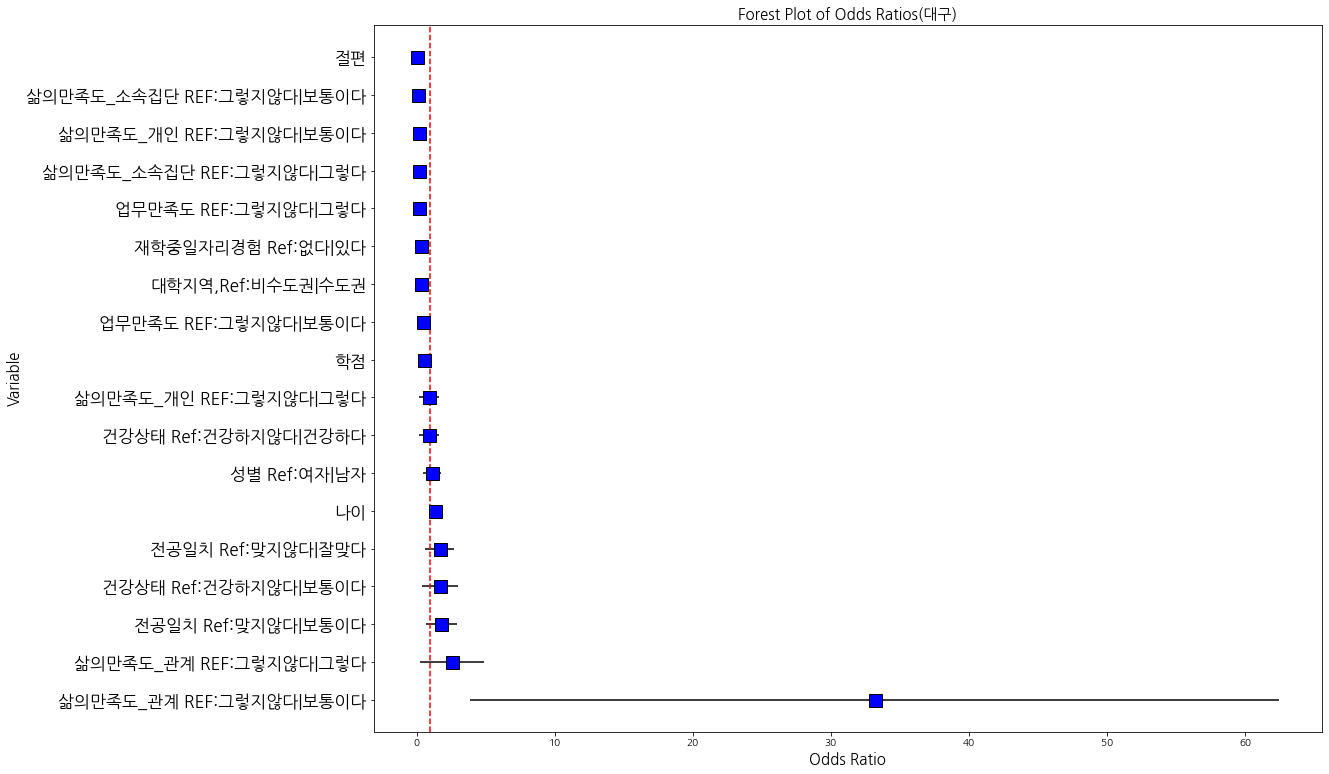

In [ ]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios.loc[var, "OR"], odds_ratios.loc[var, "Lower CI"], odds_ratios.loc[var, "Upper CI"]) for var in odds_ratios.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios(대구)', fontsize=15)

# Show the plot
plt.show()

#### Using Forest plot packages

![Example Image](https://raw.githubusercontent.com/LSYS/forestplot/main/docs/images/main.png)

In [51]:
odds_ratios.group.unique()

array(['intercept', 'gender', 'health status', 'marital status',
       'college region', 'major match',
       'Job experience while attending school',
       'Life satisfaction_individual', 'Life satisfaction_relationship',
       'Life satisfaction_member group', 'life satisfaction_member group',
       'job satisfaction', 'Job Satisfaction', 'Age', 'Grade'],
      dtype=object)

<Figure size 1224x1080 with 0 Axes>

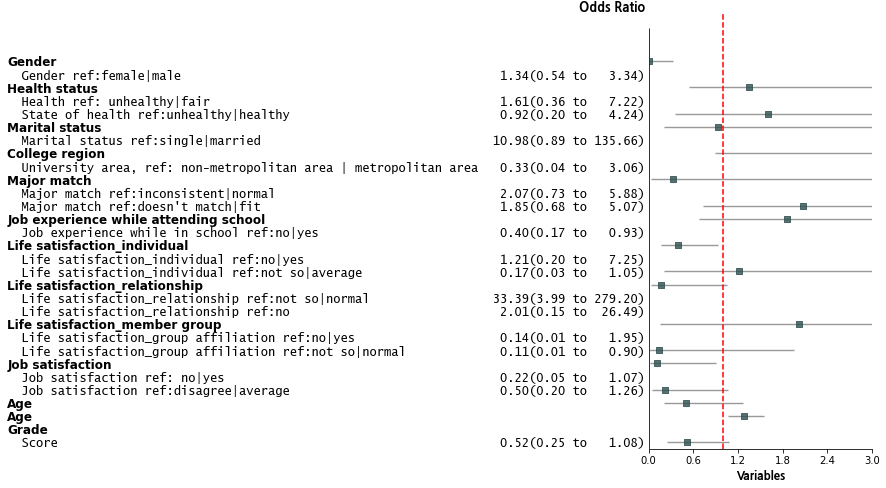

In [66]:
plt.figure(figsize=(17,15))

fp.forestplot(odds_ratios,  # the dataframe with results data
              estimate="OR",  # col containing estimated effect size 
              moerror='moerror',
              varlabel='label',
              capitalize='capitalize',
              groupvar='group',
              ll="Lower CI",  # column containing conf. int. lower limit
              hl="Upper CI",  # column containing conf. int. upper limit
                # column containing variable label
              ylabel="Odds Ratio",  # y-label title
              xlabel="Variables",  # x-label title
              group_order=['intercept', 'gender', 'health status', 'marital status',
       'college region', 'major match',
       'Job experience while attending school',
       'Life satisfaction_individual', 'Life satisfaction_relationship',
       'Life satisfaction_member group', 'life satisfaction_member group',
       'job satisfaction', 'Job Satisfaction', 'Age', 'Grade'],
              sort=True
              )

plt.xlim(left=0, right=3) 
plt.axvline(x=1, color='red', linestyle='--')
plt.show()